# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

ImportError: cannot import name 'st' from 'scipy.stats' (/Users/cayleymorrow/anaconda3/envs/PythonData/lib/python3.10/site-packages/scipy/stats/__init__.py)

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = weather_api_key
query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | uturoa
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | thunder bay
Processing Record 5 of Set 1 | papao
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | leitchfield
Processing Record 9 of Set 1 | holualoa
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | ciudad constitucion
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | furukawa
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | prainha
Processing Record 17 of Set 1 | viligili
City not found. Skipping...
Processing Record 18 of Set 1 | xilin hot
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | yellowk

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,19.97,86,75,2.57,US,1693382649
1,uturoa,-16.7333,-151.4333,24.97,84,89,9.03,PF,1693382649
2,adamstown,-25.0660,-130.1015,18.27,90,100,3.82,PN,1693382650
3,thunder bay,48.4001,-89.3168,7.99,79,0,1.71,CA,1693382650
4,papao,-17.7500,-149.5500,24.82,89,100,8.38,PF,1693382651


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,19.97,86,75,2.57,US,1693382649
1,uturoa,-16.7333,-151.4333,24.97,84,89,9.03,PF,1693382649
2,adamstown,-25.0660,-130.1015,18.27,90,100,3.82,PN,1693382650
3,thunder bay,48.4001,-89.3168,7.99,79,0,1.71,CA,1693382650
4,papao,-17.7500,-149.5500,24.82,89,100,8.38,PF,1693382651


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

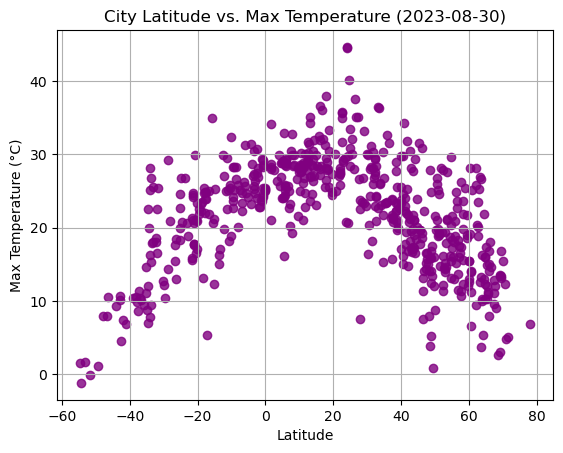

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="purple", alpha=0.8)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d", time.localtime())
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

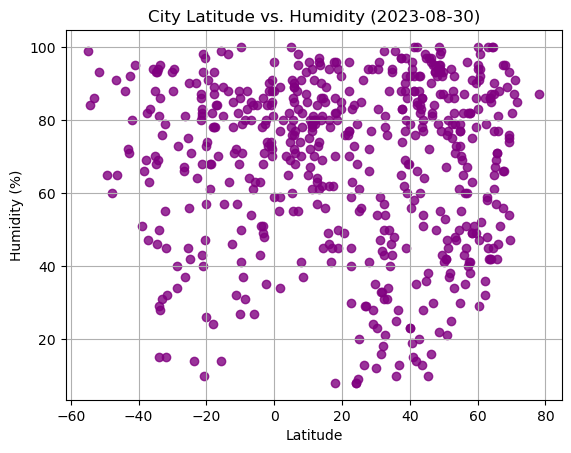

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="purple", alpha=0.8)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d", time.localtime())
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

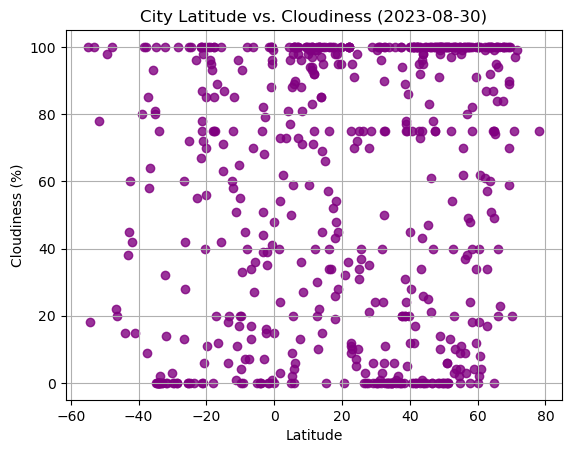

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="purple", alpha=0.8)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d", time.localtime())
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

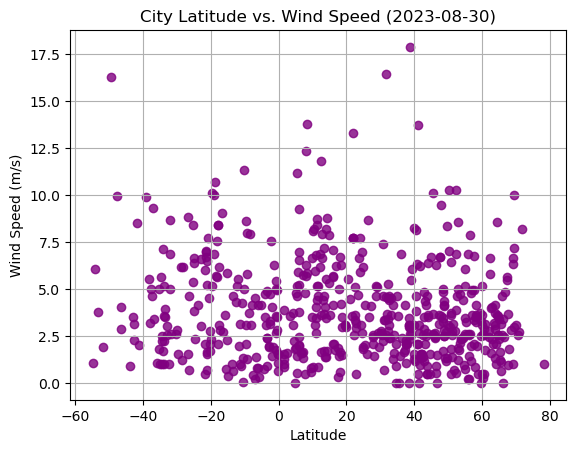

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="purple", alpha=0.8)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d", time.localtime())
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    print(f"The r-value is: {r_value}")
    # Create scatter plot
    plt.scatter(x_values, y_values, color="purple", alpha=0.8)
    
    # Plot regression line
    plt.plot(x_values, regression_line, color="orange")
    
    # Annotate the equation
    plt.annotate(equation, coordinates, fontsize=12, color="orange")
    
    # Incorporate graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Display the plot
    plt.show()

In [89]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,19.97,86,75,2.57,US,1693382649
3,thunder bay,48.4001,-89.3168,7.99,79,0,1.71,CA,1693382650
7,leitchfield,37.4800,-86.2939,15.66,97,0,2.31,US,1693382652
8,holualoa,19.6228,-155.9522,24.91,83,100,3.09,US,1693382653
9,ribeira grande,38.5167,-28.7000,22.22,88,20,3.09,PT,1693382653


In [90]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,uturoa,-16.7333,-151.4333,24.97,84,89,9.03,PF,1693382649
2,adamstown,-25.0660,-130.1015,18.27,90,100,3.82,PN,1693382650
4,papao,-17.7500,-149.5500,24.82,89,100,8.38,PF,1693382651
5,port-aux-francais,-49.3500,70.2167,1.13,65,98,16.29,TF,1693382452
6,waitangi,-43.9535,-176.5597,9.34,88,15,0.89,NZ,1693382652


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6819426573487845


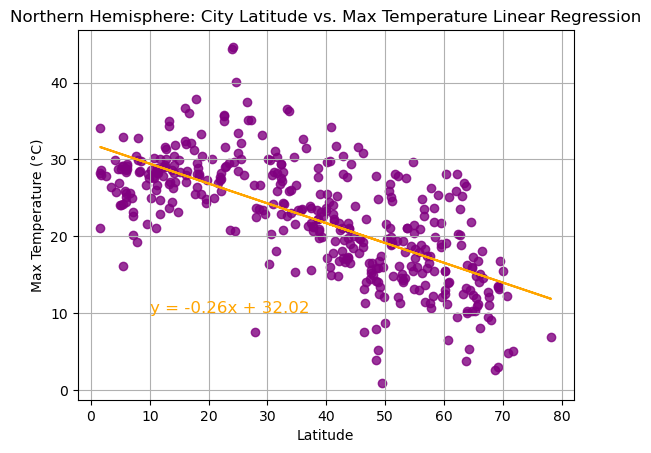

In [108]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)",
                       "Northern Hemisphere: City Latitude vs. Max Temperature Linear Regression", (10, 10))

The r-value is: 0.7780197075923474


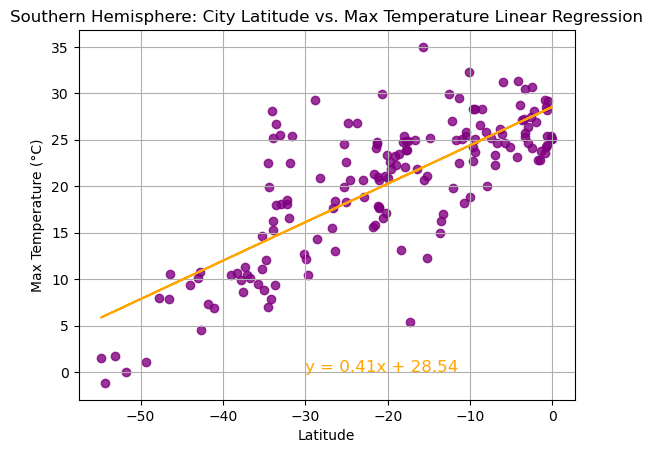

In [109]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)",
                       "Southern Hemisphere: City Latitude vs. Max Temperature Linear Regression", (-30, 0))

**Discussion about the linear relationship:** There is a strong negative linear relation between latitude and maximum temperature in the Northen Hemisphere and there is a strong positive linear relation between latitude and maximum temperature in the Southern Hemisphere. This is supported by both r-values. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03127595322924345


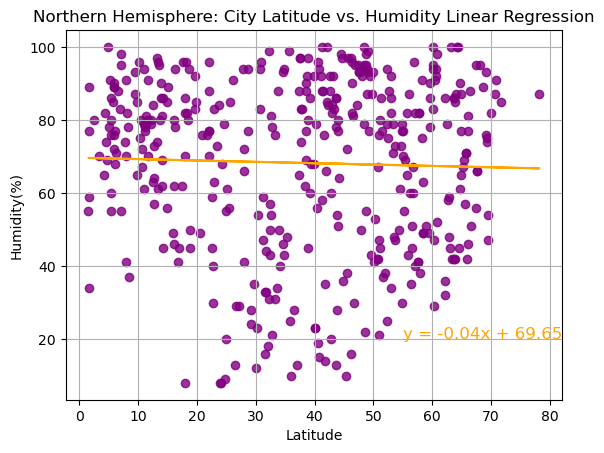

In [110]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity(%)",
                       "Northern Hemisphere: City Latitude vs. Humidity Linear Regression", (55, 20))

The r-value is: -0.011678153092333072


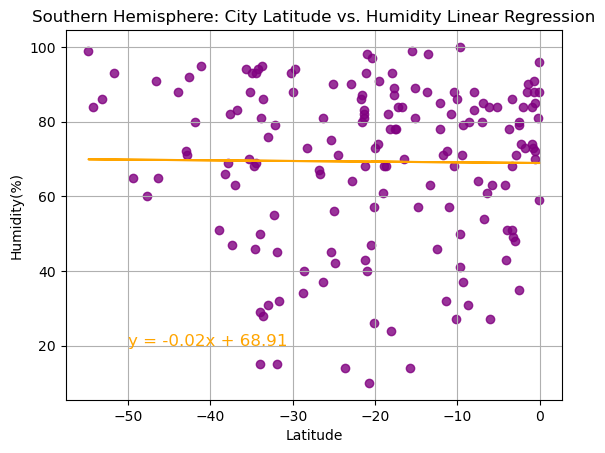

In [111]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity(%)",
                       "Southern Hemisphere: City Latitude vs. Humidity Linear Regression", (-50, 20))

**Discussion about the linear relationship:** As seen by both plots for the Northen and Southern Hemispheres there is a very weak negative linear relation. This is supported by the r-value.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.022655668820328424


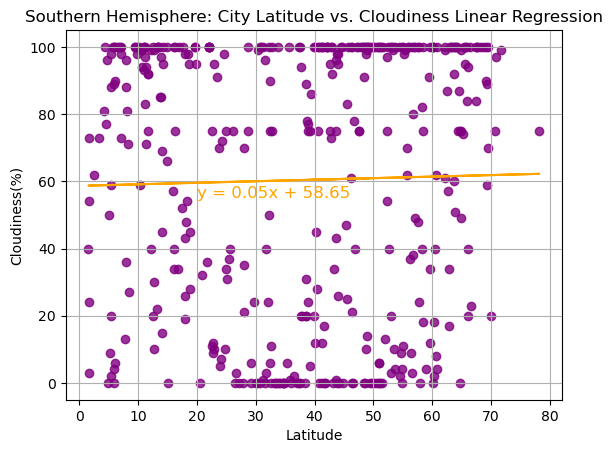

In [112]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness(%)",
                       "Southern Hemisphere: City Latitude vs. Cloudiness Linear Regression", (20, 55))

The r-value is: 0.0053116312419322215


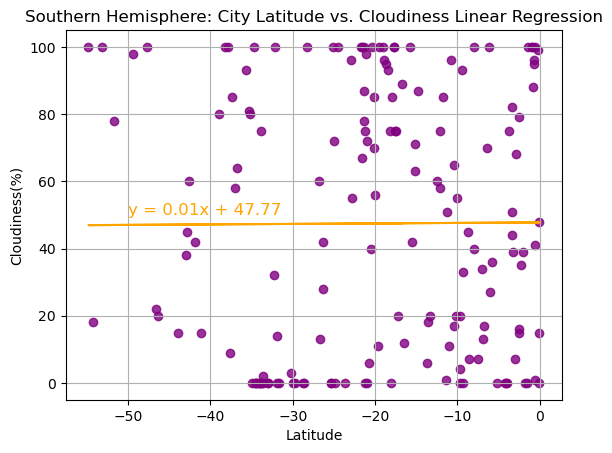

In [115]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness(%)",
                       "Southern Hemisphere: City Latitude vs. Cloudiness Linear Regression", (-50, 50))

**Discussion about the linear relationship:** The Northern Hemisphere has a weak positive linear relationship between latitude and cloudiness, as supported by the r-value. But the Southern Hemisphere has no linear relationship between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.14987642795421505


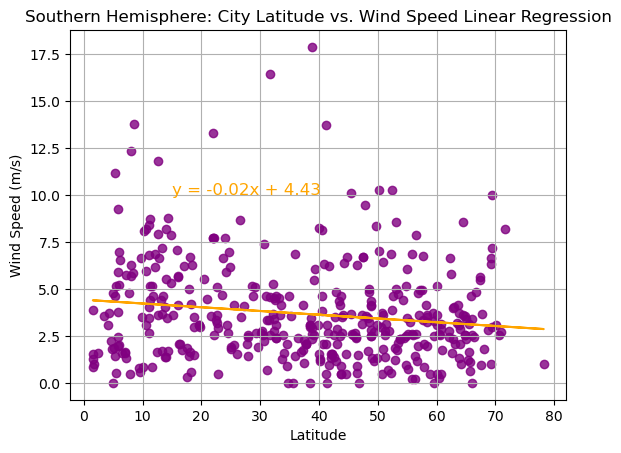

In [122]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",
                       "Southern Hemisphere: City Latitude vs. Wind Speed Linear Regression", (15, 10))

The r-value is: -0.16399481957269527


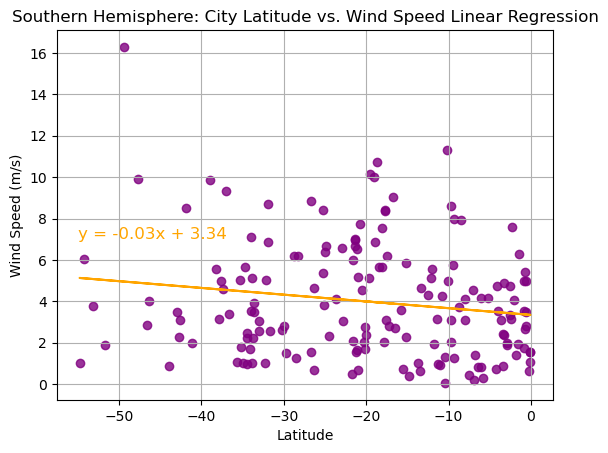

In [120]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",
                       "Southern Hemisphere: City Latitude vs. Wind Speed Linear Regression", (-55, 7))

**Discussion about the linear relationship:** In both the Northen and Southern Hemisphere there is a moderate negative linear relationship between Latitude and Wind Speed. This is supported by the r-value. 